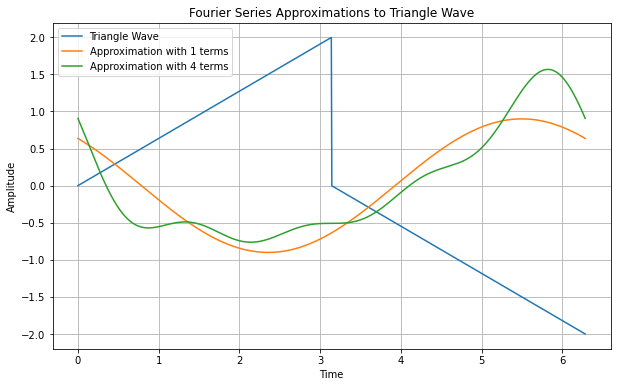

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the triangle wave function
def triangle_wave(t):
    if 0 <= t <= np.pi:
        return (2 / np.pi) * t
    elif np.pi < t <= 2*np.pi:
        return (-2 / np.pi) * t + 2

# Fourier series coefficients
def a_n(n):
    if n == 0:
        return 0
    else:
        return 2 / (n**2 * np.pi)

def b_n(n):
    if n == 0:
        return np.pi / 2
    else:
        return -2 / (n * np.pi)

# Fourier series approximation
def fourier_series_approx(t, num_terms):
    result = a_n(0) / 2  # Adding the constant term a_0 / 2
    for i in range(1, num_terms + 1):
        result += a_n(i) * np.cos(i * t) + b_n(i) * np.sin(i * t)
    return result

# Generate time values
t_values = np.linspace(0, 2*np.pi, 1000)

# Plot original triangle wave
plt.figure(figsize=(10, 6))
plt.plot(t_values, [triangle_wave(t) for t in t_values], label='Triangle Wave')

# Plot approximations
for num_terms in [1, 4]:
    approx_values = [fourier_series_approx(t, num_terms) for t in t_values]
    plt.plot(t_values, approx_values, label=f'Approximation with {num_terms} terms')

plt.title('Fourier Series Approximations to Triangle Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

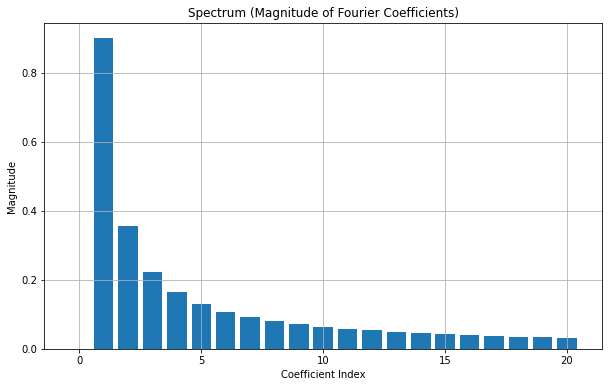

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier series coefficients
def a_n(n):
    if n == 0:
        return 0
    else:
        return 2 / (n**2 * np.pi)

def b_n(n):
    if n == 0:
        return np.pi / 2
    else:
        return -2 / (n * np.pi)

# Calculate the magnitude of coefficients up to a certain number of terms
def coefficient_magnitudes(num_terms):
    magnitudes = [a_n(0) / 2]  # Start with the constant term
    for i in range(1, num_terms + 1):
        magnitudes.append(np.sqrt(a_n(i)**2 + b_n(i)**2))
    return magnitudes

# Number of terms in the Fourier series
num_terms = 20

# Calculate magnitudes of coefficients
magnitudes = coefficient_magnitudes(num_terms)

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(range(num_terms + 1), magnitudes)
plt.title('Spectrum (Magnitude of Fourier Coefficients)')
plt.xlabel('Coefficient Index')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


In [2]:
import numpy as np
from scipy.integrate import quad

# Define the ground state wavefunction
def psi(x, L):
    return np.sqrt(2 / L) * np.sin(np.pi * x / L)

# Define the integrands for the Fourier coefficients
def integrand_a0(x, L):
    return psi(x, L)

def integrand_a1(x, L):
    return psi(x, L) * np.cos(2 * np.pi * x / L)

def integrand_b1(x, L):
    return psi(x, L) * np.sin(2 * np.pi * x / L)

def integrand_a2(x, L):
    return psi(x, L) * np.cos(4 * np.pi * x / L)

# Define the box length
L = 1.0

# Perform numerical integration to calculate the Fourier coefficients
a0, _ = quad(integrand_a0, 0, L, args=(L,))
a1, _ = quad(integrand_a1, 0, L, args=(L,))
b1, _ = quad(integrand_b1, 0, L, args=(L,))
a2, _ = quad(integrand_a2, 0, L, args=(L,))

# Print the coefficients
print("a0 coefficient:", a0)
print("a1 coefficient:", a1)
print("b1 coefficient:", b1)
print("a2 coefficient:", a2)

a0 coefficient: 0.9003163161571063
a1 coefficient: -0.30010543871903533
b1 coefficient: 2.870450490201796e-17
a2 coefficient: -0.06002108774380695


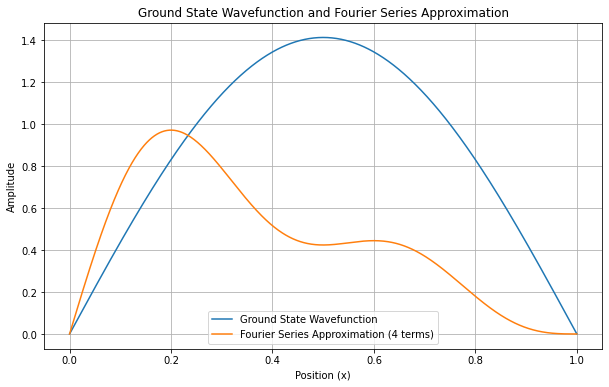

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Define the ground state wavefunction
def psi(x, L):
    return np.sqrt(2 / L) * np.sin(np.pi * x / L)

# Define the Fourier series approximation
def fourier_series(x, L, num_terms):
    result = 0
    for n in range(1, num_terms + 1):
        result += (2 / (n * np.pi)) * np.sin(n * np.pi * x / L)
    return result

# Define the box length
L = 1.0

# Generate x values
x_values = np.linspace(0, L, 1000)

# Calculate the ground state wavefunction values
psi_values = psi(x_values, L)

# Calculate the Fourier series approximation values (using 4 terms)
fourier_values = fourier_series(x_values, L, num_terms=4)

# Plot the ground state wavefunction and its approximation
plt.figure(figsize=(10, 6))
plt.plot(x_values, psi_values, label='Ground State Wavefunction')
plt.plot(x_values, fourier_values, label='Fourier Series Approximation (4 terms)')
plt.title('Ground State Wavefunction and Fourier Series Approximation')
plt.xlabel('Position (x)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()